In [1]:
from modelTraining import run_model
import joblib
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
SEED = 42
num_features = 4

# --- Carregar dataset Iris ---
def load_data_set():
    data = load_iris()
    X = data.data
    y = data.target
    return X, y

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Modelo salvo em {filename}")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Modelo carregado de {filename}")
    return model


X_iris, y_iris = load_data_set()

# EX 2

## EX 2.3.1. - TVT

Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


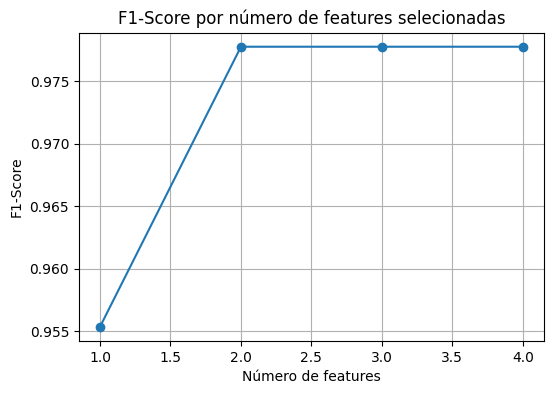

Best Parameters: {'n_neighbors': 1}

===== EX 2.3.1 TVT - KNN =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em ./models/ex2_3_1_tvt.pkl
FINAL METRICS: {'confusion_matrix': array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]]), 'recall': 0.9333333333333332, 'precision': 0.9345238095238096, 'f1-score': 0.9332591768631814}


In [3]:
model = KNeighborsClassifier()
parameters = { 'n_neighbors': list(range(1, 16, 2)) }
filename = "./models/ex2_3_1_tvt.pkl"
metrics = run_model(X_iris, y_iris, model, "TVT", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

## EX 2.3.1. - CV

In [4]:
models = {
    "OneR": DummyClassifier(),     
    "kNN": KNeighborsClassifier(),                           # k=5 por defeito
    "C4.5": DecisionTreeClassifier(random_state=SEED),       # Decision Tree
    "SVM": SVC(random_state=SEED)                         # SVM com kernel RBF por omissão
    # "ANN": MLPClassifier(random_state=SEED, max_iter=1000)   # Rede Neural
}

parameters = {

    'OneR': {
        'strategy': ['most_frequent', 'stratified', 'uniform']   # <-- parâmetros adicionados
    },

    'kNN' : {
        'n_neighbors': [1, 3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

    'C4.5' : {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },

    'SVM' : {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # 'ANN': {
    #     'hidden_layer_sizes': [(50,), (100,), (50,50)],
    #     'activation': ['tanh'],
    #     'alpha': [0.0001, 0.001, 0.01]
    # } estava a dar o warning: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
}

filename = "./models/ex2_3_1_cv.pkl"
metrics = run_model(X_iris, y_iris, models, "CV", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

Fold 0
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 1
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 2
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 3
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': 

,Mean_F1,Std_F1
OneR,0.328935,0.137203
kNN,0.944704,0.059554
C4.5,0.952086,0.051988
SVM,0.957377,0.047925


Modelo com maior média de F1: SVM
SVC(random_state=42)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99
[3, 2, 0, 1] 0.9684175084175085
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 

TypeError: object of type 'float' has no len()